**HVC X neurons**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import numpy as np
import warnings
from sklearn.decomposition import PCA

In [ ]:
file_path ='/content/drive/MyDrive/Myriamsdatasets.xlsx'
df = pd.read_excel(file_path)
df.head()

,Label,Soma Size,No. of primary dendrites,No. of secondary dendrites,Length of primary dendrites,Length of secondary dendrites,No. of spines per primary dendrites,No. of spines per secondary dendrites
0,Green 114 - 5,82.12,5,8,34.60000,49.28000,5.800000,9.900000
1,Blue 243 - 4,82.99,5,9,30.52000,53.90000,4.100000,10.320000
2,N3_40X_Green490,83.89,9,14,24.30291,60.12327,5.222222,14.928571
3,Orange 108 - 2,85.97,4,9,31.94000,54.62000,5.500000,12.240000
4,Green 114 - 4,86.90,4,9,29.28000,49.33000,5.100000,13.400000


Descriptive Stats

In [ ]:
descriptive_stats = df.describe()
descriptive_stats

,Soma Size,No. of primary dendrites,No. of secondary dendrites,Length of primary dendrites,Length of secondary dendrites,No. of spines per primary dendrites,No. of spines per secondary dendrites
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000
mean,146.580000,5.138889,10.027778,20.176161,42.140469,4.171682,12.261020
std,41.643283,1.174802,2.524012,8.011696,18.141146,2.601319,7.084144
min,82.120000,3.000000,5.000000,8.247286,14.440660,0.000000,0.200000
25%,111.300000,4.750000,8.750000,13.591735,30.615000,1.862500,5.771875
50%,148.500000,5.000000,10.000000,19.309620,34.492395,4.150000,13.635000
75%,175.725000,6.000000,12.000000,24.459682,54.290000,6.500000,17.145000
max,221.400000,9.000000,16.000000,38.897160,77.620000,9.200000,25.240000


In [ ]:
labels = df['Label']
neurons = df.drop('Label', axis=1)
neurons.head()

,Soma Size,No. of primary dendrites,No. of secondary dendrites,Length of primary dendrites,Length of secondary dendrites,No. of spines per primary dendrites,No. of spines per secondary dendrites
0,82.12,5,8,34.60000,49.28000,5.800000,9.900000
1,82.99,5,9,30.52000,53.90000,4.100000,10.320000
2,83.89,9,14,24.30291,60.12327,5.222222,14.928571
3,85.97,4,9,31.94000,54.62000,5.500000,12.240000
4,86.90,4,9,29.28000,49.33000,5.100000,13.400000


Correlation Plot


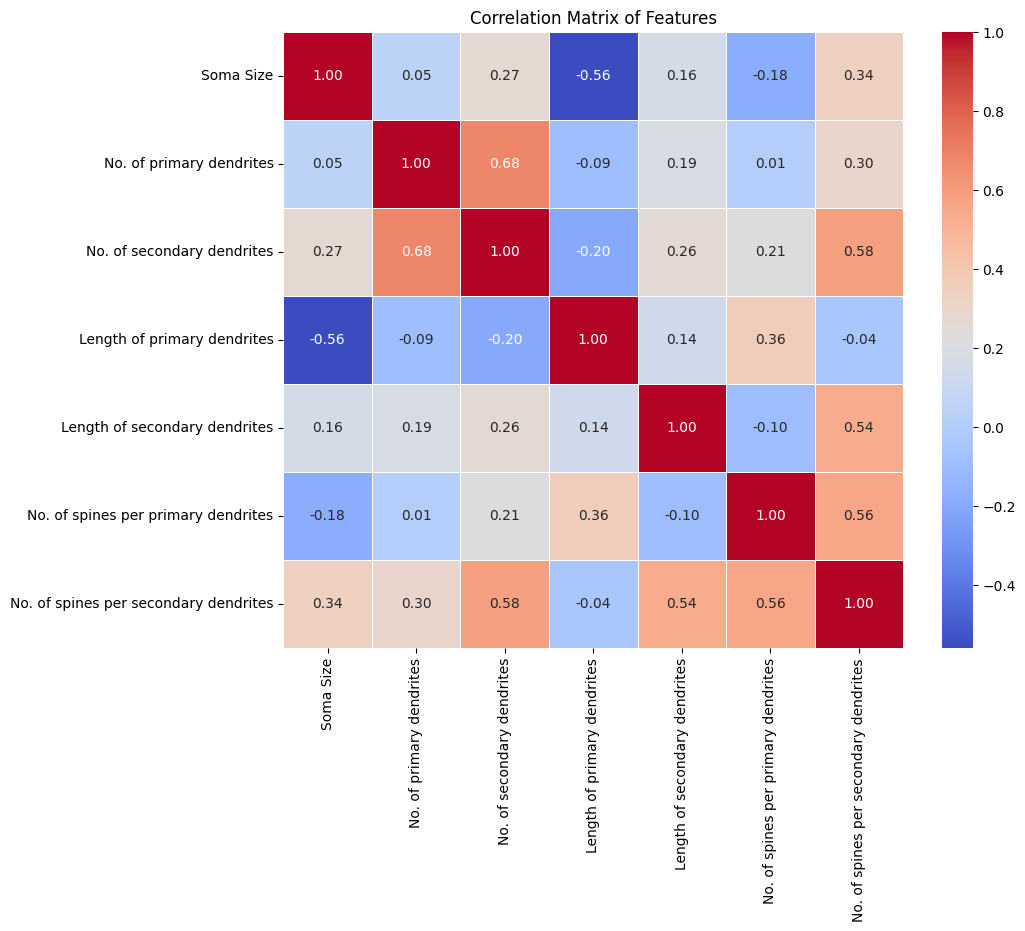

In [ ]:
correlation_matrix = neurons.corr()

# Plotting the heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Features')
plt.show()

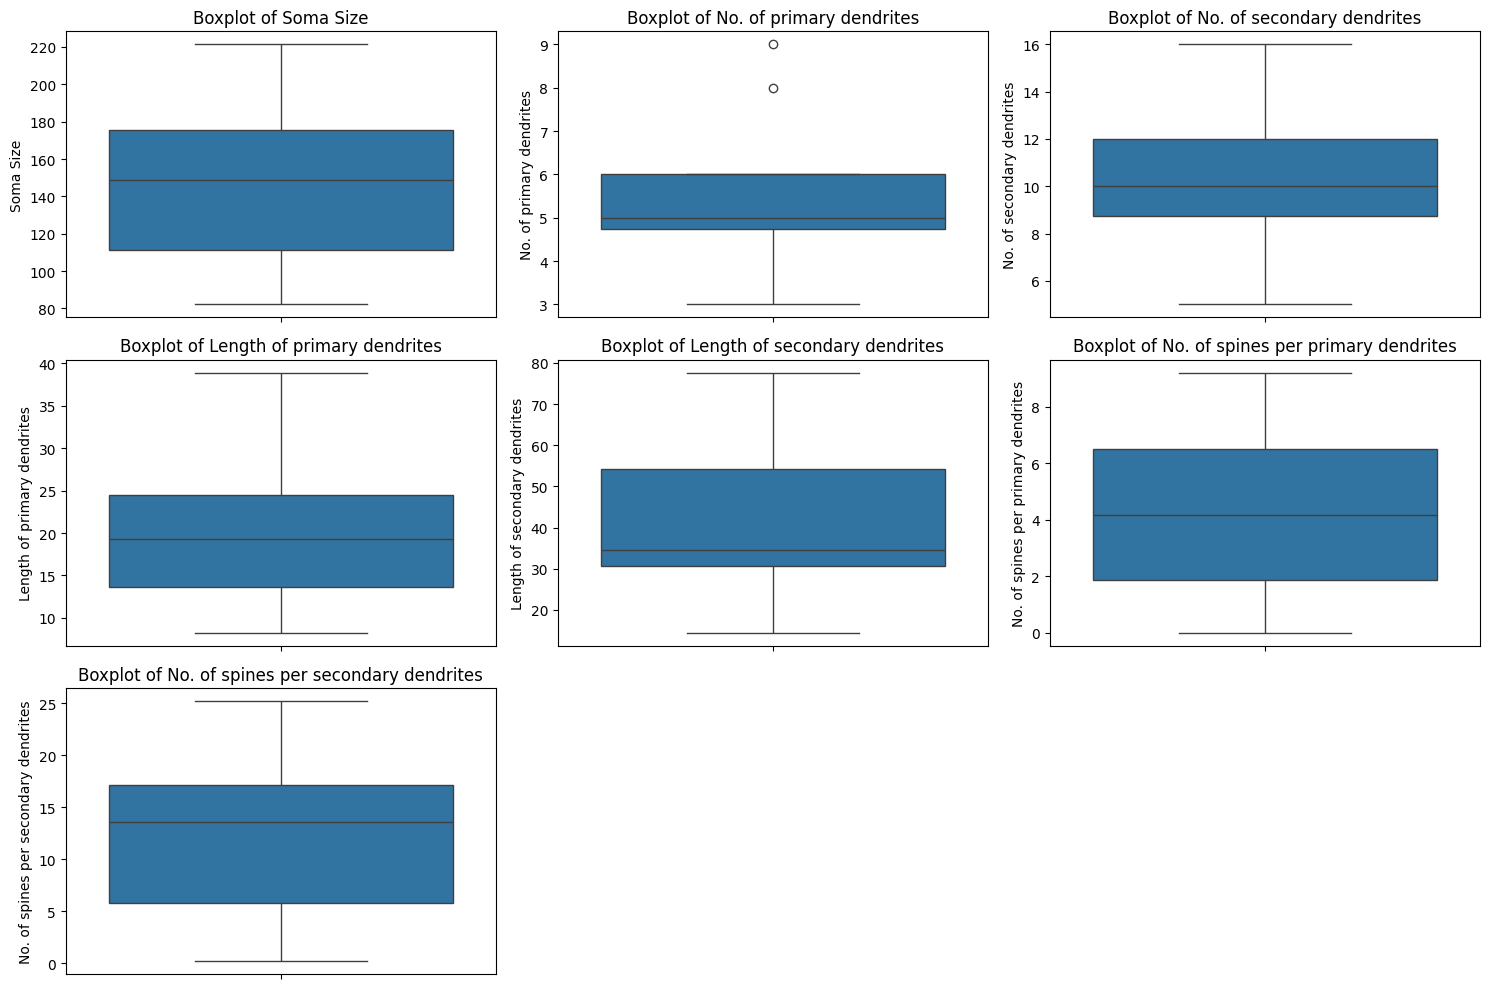

In [ ]:
fig, axes = plt.subplots(nrows=len(neurons.columns)//3 + 1, ncols=3, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(neurons.select_dtypes(include=['float64', 'int64']).columns):
  sns.boxplot(y=neurons[col], ax=axes[i])
  axes[i].set_title(f'Boxplot of {col}')
  axes[i].set_ylabel(col)
for ax in axes[len(neurons.columns):]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()

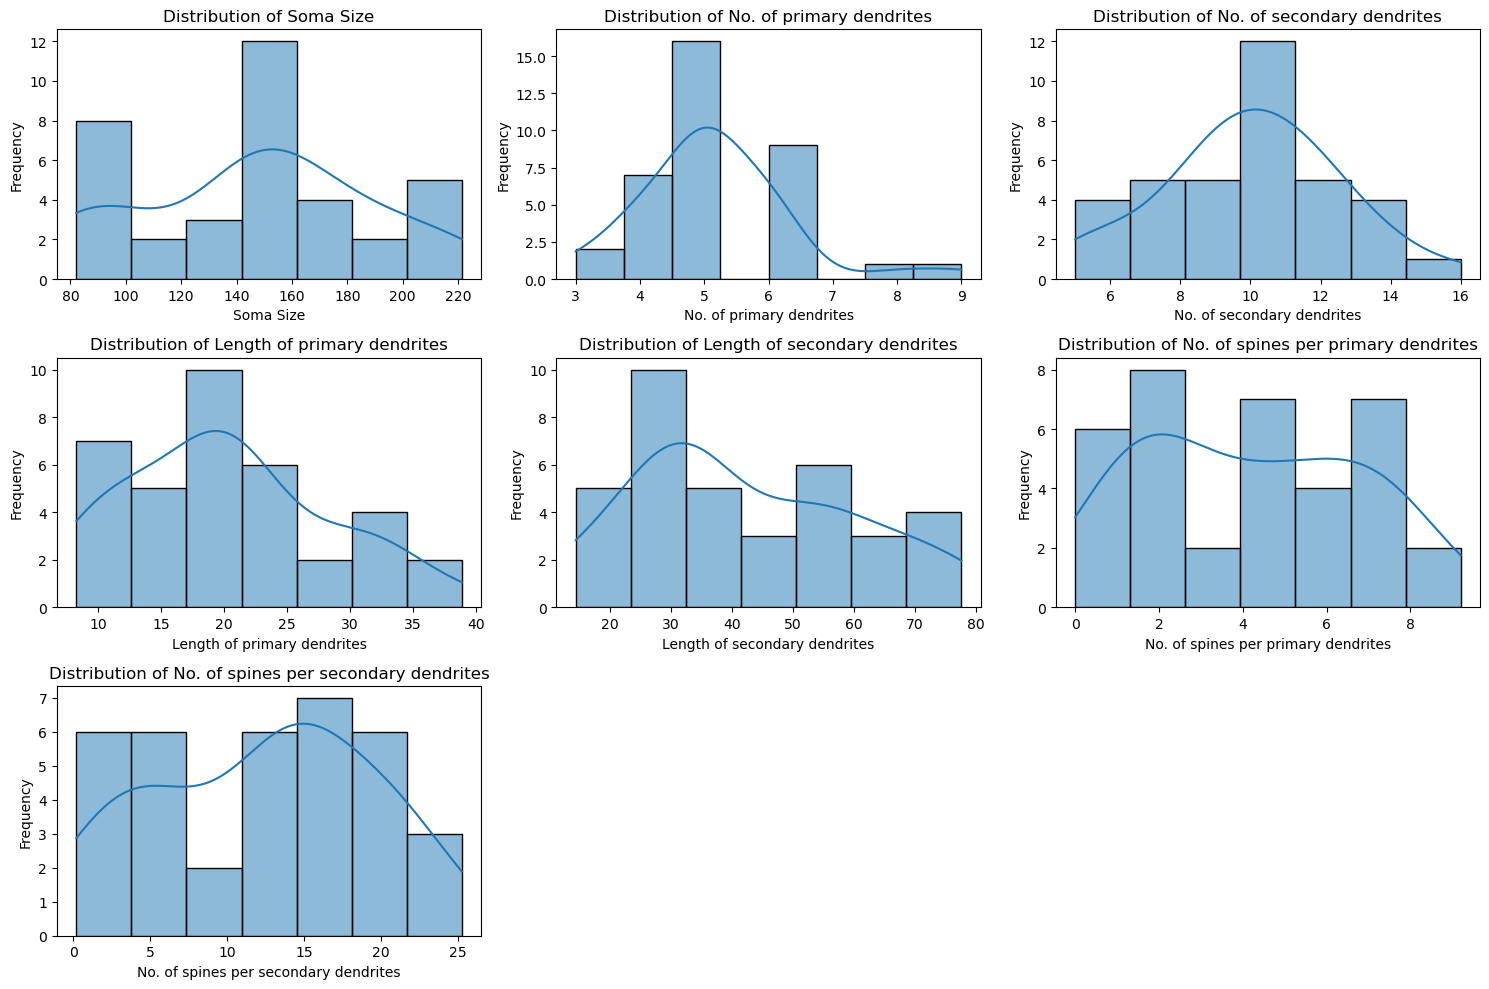

In [ ]:
fig, axes = plt.subplots(nrows=len(neurons.columns)//3 + 1, ncols=3, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(neurons.select_dtypes(include=['float64', 'int64']).columns):
  sns.histplot(neurons[col], kde=True, ax=axes[i])
  axes[i].set_title(f'Distribution of {col}')
  axes[i].set_xlabel(col)
  axes[i].set_ylabel('Frequency')
for ax in axes[len(neurons.columns):]:
  ax.set_visible(False)

plt.tight_layout()
plt.show()

Note that "Number of Primary Dendrite" and "Number of Secondary Dendrites" are discrete.

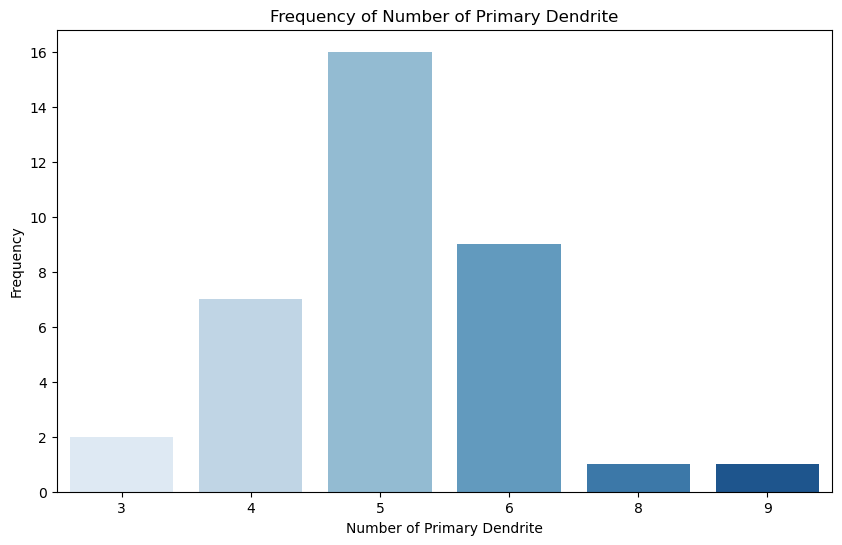

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='No. of primary dendrites', data=neurons, palette='Blues')
plt.title('Frequency of Number of Primary Dendrite')
plt.xlabel('Number of Primary Dendrite')
plt.ylabel('Frequency')
plt.show()

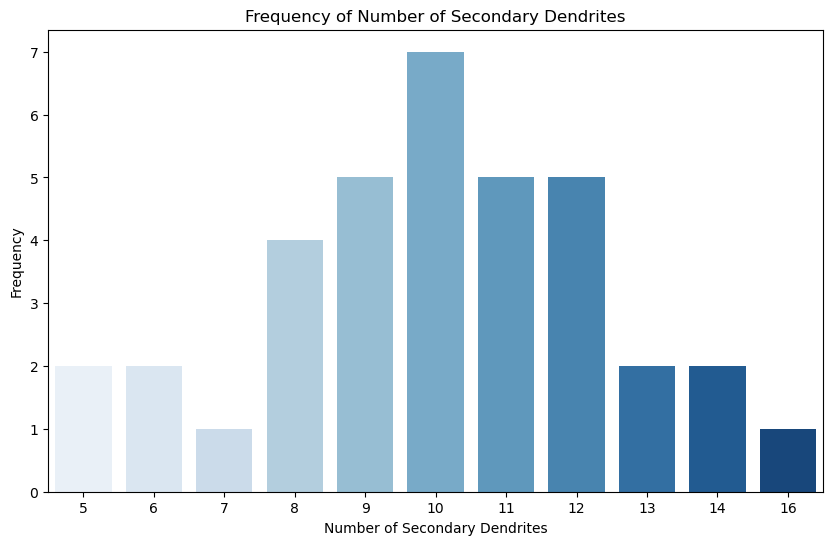

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='No. of secondary dendrites', data=neurons, palette='Blues')
plt.title('Frequency of Number of Secondary Dendrites')
plt.xlabel('Number of Secondary Dendrites')
plt.ylabel('Frequency')
plt.show()

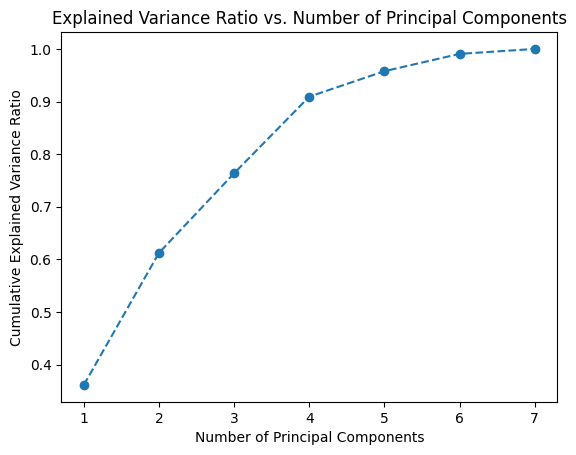

In [ ]:
# PCA
scaler = StandardScaler()
neurons_standardized = scaler.fit_transform(neurons)

pca = PCA()
principal_components = pca.fit_transform(neurons_standardized)

explained_variance_ratio = pca.explained_variance_ratio_

plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio.cumsum(), marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Explained Variance Ratio vs. Number of Principal Components')
plt.show()

Four principal components retreive abour 90% of the explained variance ratio, so we will set the number of components to 4

In [ ]:
# 4 componenets allow us to retain 90% of the variance
n_components = 4

# Redo PCA with the chosen number of components
pca = PCA(n_components=n_components)
principal_components = pca.fit_transform(neurons_standardized)

principal_df = pd.DataFrame(data=principal_components, columns=[f'PC{i}' for i in range(1, n_components + 1)])

final_df = pd.concat([principal_df], axis=1)

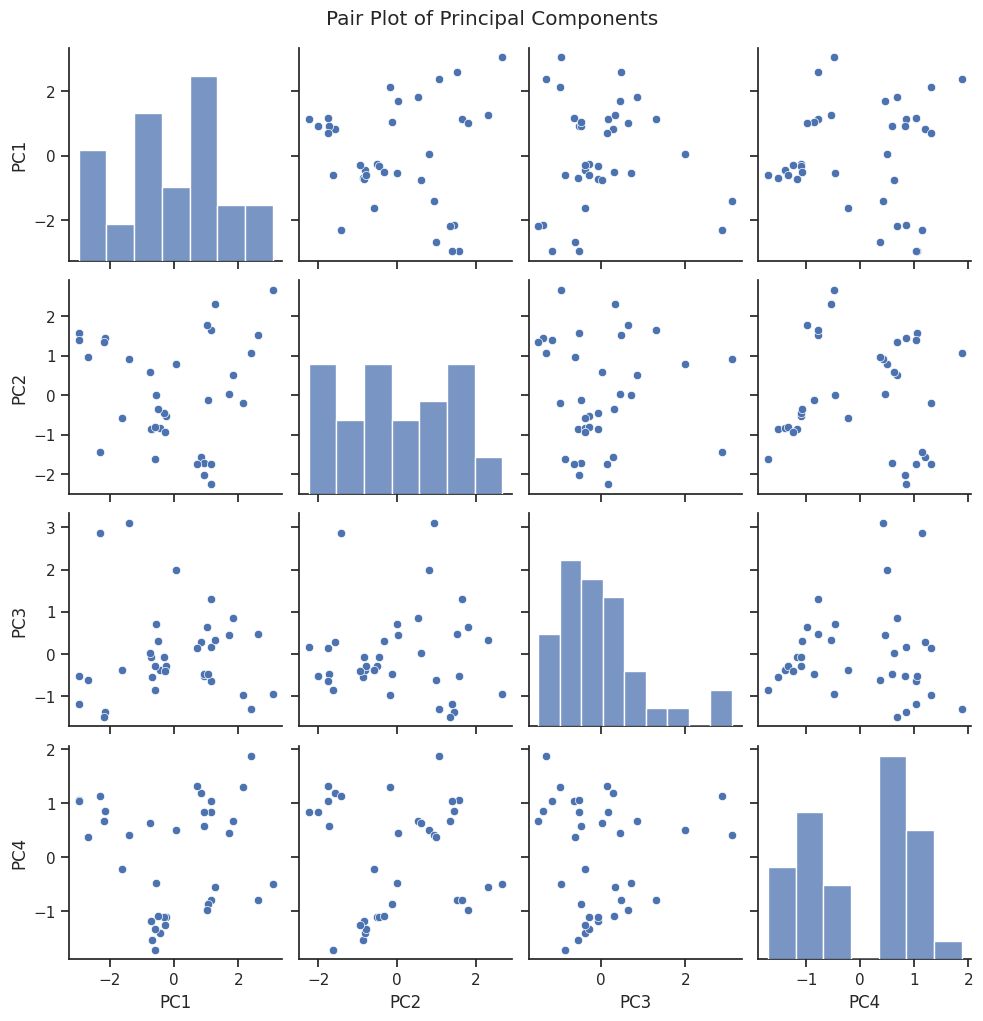

In [ ]:
# Plotting the pair plot for the principal components
sns.set(style="ticks")
sns.pairplot(principal_df)
plt.suptitle('Pair Plot of Principal Components', y=1.02)
plt.show()

In [ ]:
# Get the loadings for each principal component
loadings = pca.components_
chosen_component_index = 0
chosen_component_loadings = loadings[chosen_component_index]

loadings_df = pd.DataFrame(chosen_component_loadings, index=neurons.columns, columns=['Loading'])
sorted_loadings_df = loadings_df.abs().sort_values(by='Loading', ascending=False)

# Display the sorted loadings to see which features contribute the most
print("Sorted Loadings for the First Principal Component:")
print(sorted_loadings_df)

Sorted Loadings for the First Principal Component:
                                        Loading
No. of secondary dendrites             0.539667
No. of spines per secondary dendrites  0.538394
No. of primary dendrites               0.405608
Length of secondary dendrites          0.337213
Soma Size                              0.294072
No. of spines per primary dendrites    0.184425
Length of primary dendrites            0.142024


In [ ]:
warnings.filterwarnings('ignore')
min_clusters = 2
max_clusters = 10

silhouette_scores_with_pca = []
num_clusters_list_with_pca = []

for num_clusters in range(min_clusters, max_clusters + 1):
  silhouette_scores_for_cluster = []
  for _ in range(1000):
    kmeans = KMeans(n_clusters=num_clusters, random_state=None)
    kmeans.fit(principal_df)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(principal_df, labels)
    silhouette_scores_for_cluster.append(silhouette_avg)
  avg_silhouette_score = np.mean(silhouette_scores_for_cluster)
  silhouette_scores_with_pca.append(avg_silhouette_score)
  num_clusters_list_with_pca.append(num_clusters)

In [ ]:
warnings.filterwarnings('ignore')

silhouette_scores_no_pca = []
num_clusters_list_no_pca = []

for num_clusters in range(min_clusters, max_clusters + 1):
  silhouette_scores_for_cluster = []
  for _ in range(1000):
    kmeans = KMeans(n_clusters=num_clusters, random_state=None)
    kmeans.fit(neurons_standardized)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(neurons_standardized, labels)
    silhouette_scores_for_cluster.append(silhouette_avg)
  avg_silhouette_score = np.mean(silhouette_scores_for_cluster)
  silhouette_scores_no_pca.append(avg_silhouette_score)
  num_clusters_list_no_pca.append(num_clusters)

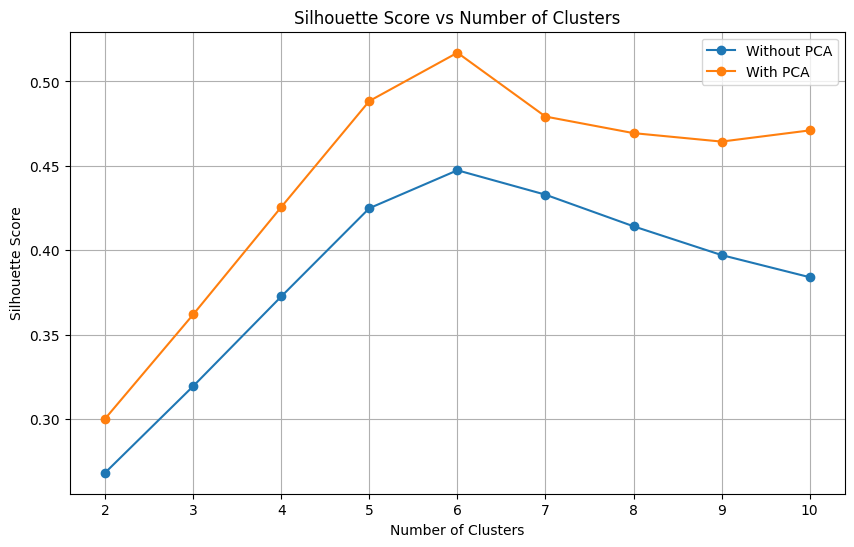

In [ ]:
plt.figure(figsize=(10, 6))

# Plot silhouette scores without PCA
plt.plot(num_clusters_list_no_pca, silhouette_scores_no_pca, marker='o', label='Without PCA')

# Plot silhouette scores with PCA
plt.plot(num_clusters_list_with_pca, silhouette_scores_with_pca, marker='o', label='With PCA')

plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Number of Clusters')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
print(silhouette_scores_no_pca)
print(silhouette_scores_with_pca)

[0.268052136632288, 0.3198656533973482, 0.37264215209499696, 0.42502255690426977, 0.44739774946189936, 0.43276853419814454, 0.4149027118989536, 0.39748608843235106, 0.38401595316697207]
[0.3001388667584963, 0.36137693364009105, 0.4259452466360615, 0.4887969547079494, 0.5170411142682991, 0.47917126366465707, 0.4694969845146049, 0.46368471088557933, 0.4708430141676629]


In [ ]:
Labels = ["N1", "N2", "N3","N4","N5","N6","N7","N8","N9","N10","N11","N12","N13","N14","N15","N16","N17","N18","N19","N20","N21","N22","N23","N24","N25","N26","N27","N28","N29","N30","N31","N32","N33","N34","N35","N36"]

In [ ]:
kmeans_with_pca = KMeans(n_clusters=6, n_init=1000, random_state=None)
kmeans_with_pca.fit(principal_components)
labels_with_pca = kmeans_with_pca.labels_

# Add cluster labels to the dataframe
principal_df['Cluster_Labels'] = labels_with_pca

# Convert Labels list to a Series
labels_series = pd.Series(Labels, name='Neuron')

# Concatenate neuron names with dataframe
df_with_names = pd.concat([labels_series, principal_df], axis=1)

# Export dataframe with cluster labels and neuron names to a CSV file
df_with_names.to_csv('clustered_dataX.csv', index=False)

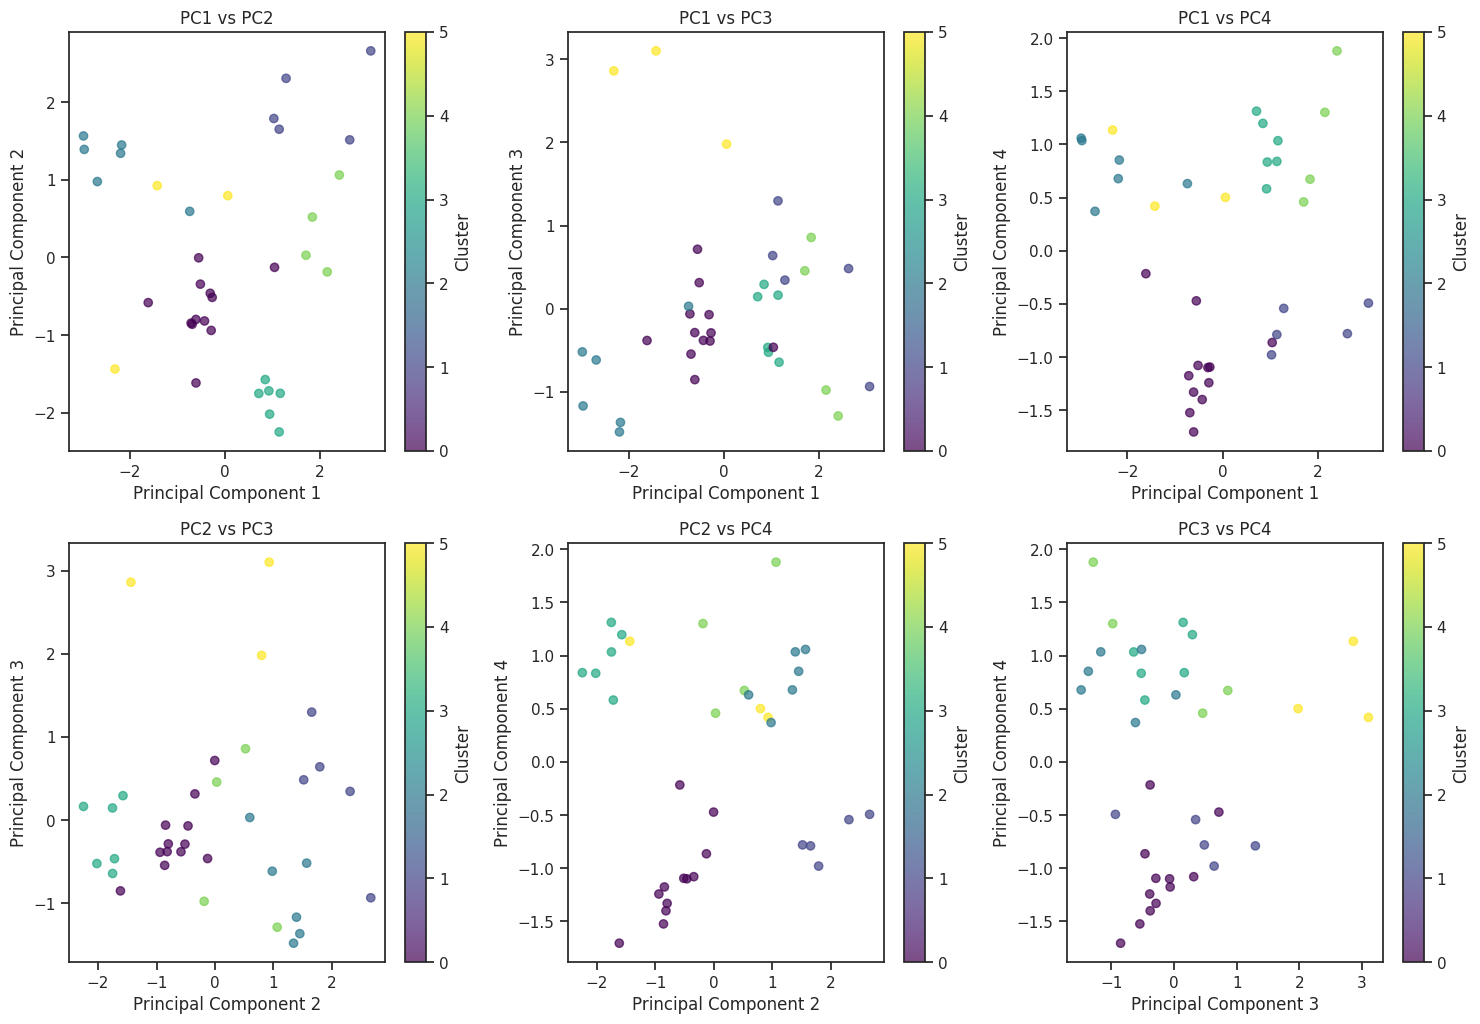

In [ ]:
import itertools

# Generate all pairs of principal components
pairs = list(itertools.combinations(range(principal_components.shape[1]), 2))

# Visualize clusters with PCA for all pairs of principal components
plt.figure(figsize=(15, 15))
for i, (pc1, pc2) in enumerate(pairs, 1):
  plt.subplot(3, 3, i)
  plt.scatter(principal_components[:, pc1], principal_components[:, pc2], c=labels_with_pca, cmap='viridis', alpha=0.7)
  plt.title(f'PC{pc1 + 1} vs PC{pc2 + 1}')
  plt.xlabel(f'Principal Component {pc1 + 1}')
  plt.ylabel(f'Principal Component {pc2 + 1}')
  plt.colorbar(label='Cluster')
plt.tight_layout()
plt.show()

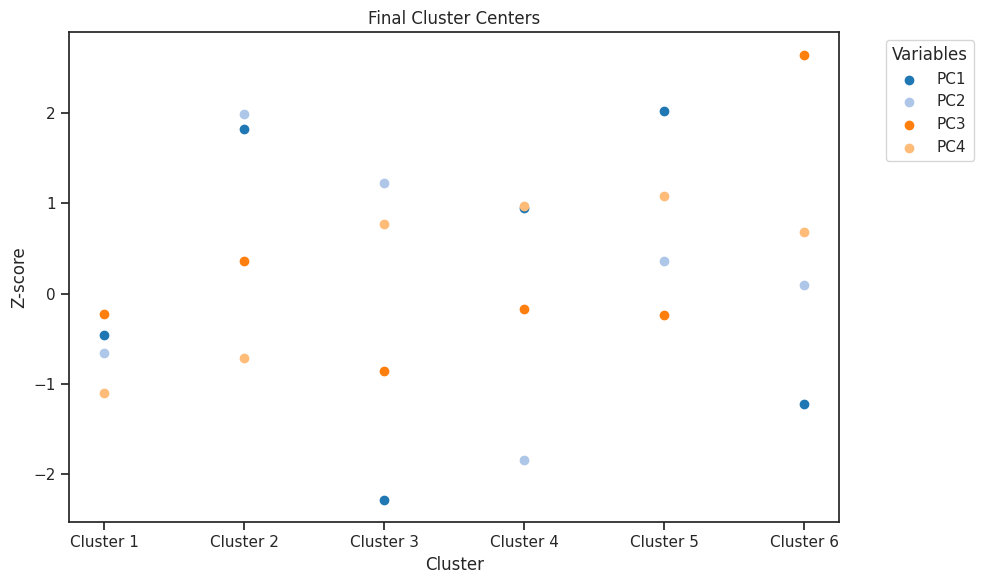

In [ ]:
# Get the centroids
centroids = kmeans_with_pca.cluster_centers_

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Generate a list of colors, one for each feature
colors = plt.cm.tab20.colors[:principal_components.shape[1]]

# Plot each feature of the centroids
for i, color in enumerate(colors):
    ax.scatter(range(6), centroids[:, i], color=color, label=principal_df.columns[i])

# Customizing the plot
ax.set_xticks(range(6))
ax.set_xticklabels([f'Cluster {i+1}' for i in range(6)])
ax.set_title('Final Cluster Centers')
ax.set_xlabel('Cluster')
ax.set_ylabel('Z-score')
ax.legend(title='Variables', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()